# <p style="text-align: center;"> Final Project - Programming for Data Science</p>
# <p style="text-align: center;"> <b> Data Exploration </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of Contents



---

### Import

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/spotify-2023.csv', encoding='ISO-8859-1')

# get 5 random samples
df.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
200,Annihilate (Spider-Man: Across the Spider-Vers...,"Swae Lee, Lil Wayne, Offset, Metro Boomin",4,2023,6,2,551,4,86773632,13,...,146,B,Minor,61,20,48,21,0,12,6
697,Something In The Way - Remastered 2021,Nirvana,1,1991,9,24,9514,0,368646862,45,...,106,G#,Major,44,8,20,74,42,11,3
724,Something Just Like This,"The Chainsmokers, Coldplay",2,2017,2,22,23375,21,2204080728,336,...,103,B,Minor,61,47,65,3,0,17,4
66,Karma,Taylor Swift,1,2022,10,21,3818,23,404562836,37,...,90,G#,Major,64,10,62,7,0,48,7
401,Heather,Conan Gray,1,2020,3,20,6170,7,1301799902,82,...,92,F,Major,47,25,43,62,0,32,3


### 1) How many rows and columns?

In [24]:
df.shape

(953, 24)

- Number of rows: 953

- Number of columns: 24

### 2) What is the meaning of each row?

- A row represents the information of a song(name, artist_name, released year,...) and some of its properties in Spotify

### 3) Are there duplicated rows?

In [25]:
df.duplicated().sum()

0

- There is no duplicated rows

### 4) What is the meaning of each colum?


- `track_name`: Name of the song

- `artist(s)_name`: Name of the artist(s) of the song

- `artist_count`: Number of artists contributing to the song

- `released_year`: Year when the song was released

- `released_month`: Month when the song was released

- `released_day`: Day of the month when the song was released

- `in_spotify_playlists`: Number of Spotify playlists the song is included in

- `in_spotify_charts`: Presence and rank of the song on Spotify charts

- `streams`: Total number of streams on Spotify

- `in_apple_playlists`: Number of Apple Music playlists the song is included in

- `in_apple_charts`: Presence and rank of the song on Apple Music charts

- `in_deezer_playlists`: Number of Deezer playlists the song is included in

- `in_deezer_charts`: Presence and rank of the song on Deezer charts

- `in_shazam_charts`: Presence and rank of the song on Shazam charts

- `bpm`: Beats per minute, a measure of song tempo

- `key`: Key of the song

- `mode`: Mode of the song (major or minor)

- `danceability_%`: Percentage indicating how suitable the song is for dancing

- `valence_%`: Positivity of the song's musical content

- `energy_%`: Perceived energy level of the song

- `acousticness_%`: Amount of acoustic sound in the song

- `instrumentalness_%`: Amount of instrumental content in the song

- `liveness_%`: Presence of live performance elements

- `speechiness_%`: Amount of spoken words in the song

### 5) What is the current data type of each column? Are there any columns having inappropriate data types?

In [26]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

There are some inapropriate columns' data types:

- `streams, in_deezer_playlists, in_shazam_charts` are **numeric**

Convert to correct data types

In [27]:
ob_to_int_cols = ['streams', 'in_deezer_playlists','in_shazam_charts']

for col in ob_to_int_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [28]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

### 6) With each numerical column, how are values distributed?

All numerical columns:

In [29]:
numerical_cols = df[df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]]

####  6.1) What is the percentage of missing values?

- Number of missing values of each columns

In [30]:
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          953 non-null    int64  
 1   released_year         953 non-null    int64  
 2   released_month        953 non-null    int64  
 3   released_day          953 non-null    int64  
 4   in_spotify_playlists  953 non-null    int64  
 5   in_spotify_charts     953 non-null    int64  
 6   streams               952 non-null    float64
 7   in_apple_playlists    953 non-null    int64  
 8   in_apple_charts       953 non-null    int64  
 9   in_deezer_playlists   874 non-null    float64
 10  in_deezer_charts      953 non-null    int64  
 11  in_shazam_charts      896 non-null    float64
 12  bpm                   953 non-null    int64  
 13  danceability_%        953 non-null    int64  
 14  valence_%             953 non-null    int64  
 15  energy_%              9

- The percentage of missing values for each columns

In [31]:
df.isnull().mean() * 100

track_name              0.000000
artist(s)_name          0.000000
artist_count            0.000000
released_year           0.000000
released_month          0.000000
released_day            0.000000
in_spotify_playlists    0.000000
in_spotify_charts       0.000000
streams                 0.104932
in_apple_playlists      0.000000
in_apple_charts         0.000000
in_deezer_playlists     8.289612
in_deezer_charts        0.000000
in_shazam_charts        5.981112
bpm                     0.000000
key                     9.968520
mode                    0.000000
danceability_%          0.000000
valence_%               0.000000
energy_%                0.000000
acousticness_%          0.000000
instrumentalness_%      0.000000
liveness_%              0.000000
speechiness_%           0.000000
dtype: float64

- Distribution of numerical attributes

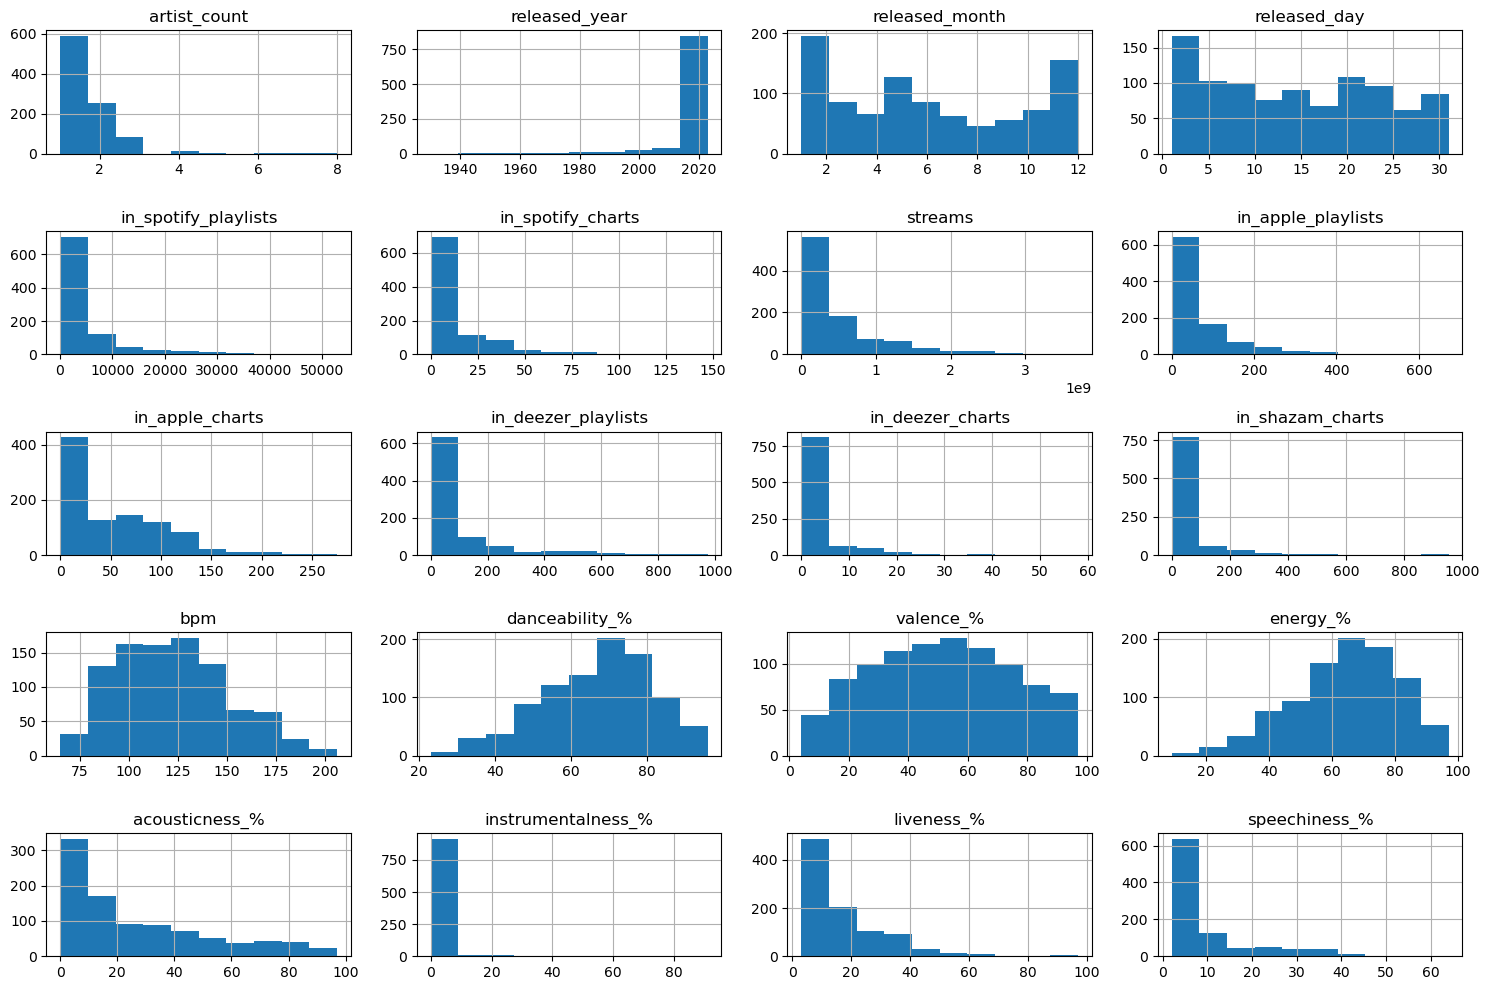

In [32]:
numerical_cols.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

- General statistics of numerical attributes

In [33]:
numerical_cols.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,874.000000,953.000000,896.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,109.740275,2.666317,51.176339,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,178.811406,6.035599,126.487856,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,12.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,36.500000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,110.000000,2.000000,36.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### 7) With each categorical column, how are values distributed?

- Quick glance at categorical columns

In [34]:
categorical_cols = df[df.columns[df.dtypes == 'object']]
categorical_cols.sample(5)

,track_name,artist(s)_name,key,mode
583,ELEVEN,IVE,A,Major
461,Wonderful Christmastime - Edited Version / Rem...,Paul McCartney,B,Major
286,En Paris,"El Chachito, Junior H",D#,Minor
362,Neverita,Bad Bunny,A#,Major
858,Boyfriends,Harry Styles,NaN,Major


- Missing values = 95

In [35]:
(categorical_cols == 'nan').sum(), categorical_cols.isna().sum()

(track_name        0
 artist(s)_name    0
 key               0
 mode              0
 dtype: int64,
 track_name         0
 artist(s)_name     0
 key               95
 mode               0
 dtype: int64)

- The distribution of `track_name` is not significantly to plot

In [36]:
categorical_cols.track_name.value_counts()

Daylight                                  2
About Damn Time                           2
SNAP                                      2
Take My Breath                            2
Let It Snow! Let It Snow! Let It Snow!    2
                                         ..
Murder In My Mind                         1
Gangsta's Paradise                        1
CAIRO                                     1
I Love You So                             1
Alone                                     1
Name: track_name, Length: 943, dtype: int64

- The distribution of `artist(s)_name`

In [37]:
categorical_cols['artist(s)_name'].value_counts()

Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: artist(s)_name, Length: 645, dtype: int64

- First 30 artist with highest numbers of songs

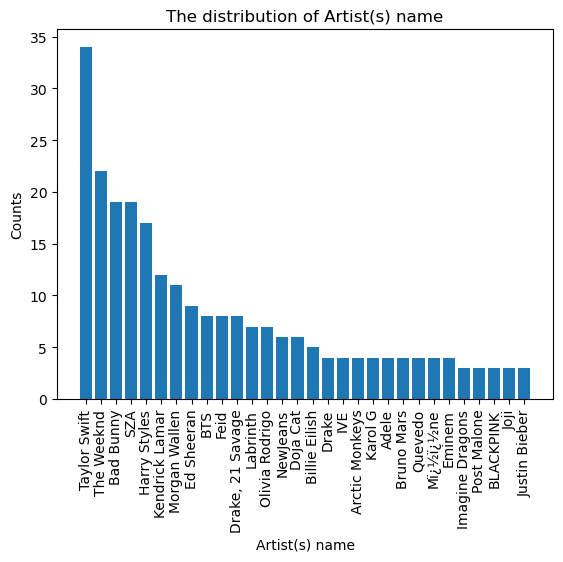

<Figure size 2000x1000 with 0 Axes>

In [38]:
artist_name_count = categorical_cols['artist(s)_name'].value_counts()[:30]
plt.bar(artist_name_count.index, artist_name_count.values);
plt.xticks(rotation=90)
plt.xlabel('Artist(s) name')
plt.ylabel('Counts')
plt.title('The distribution of Artist(s) name')
plt.figure(figsize=(20, 10))
plt.show();

- The distribution of `key`

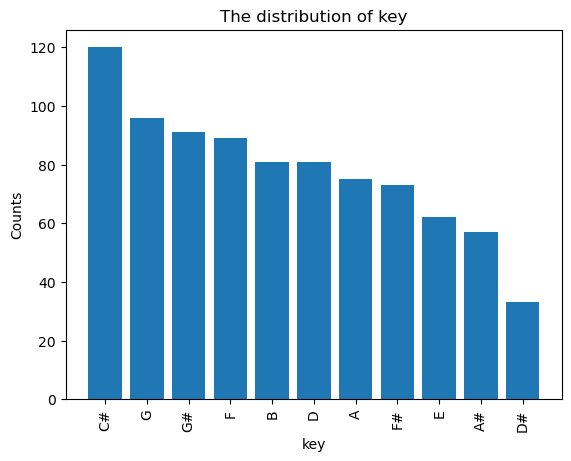

<Figure size 2000x1000 with 0 Axes>

In [39]:
key_counts = categorical_cols['key'].value_counts()

plt.bar(key_counts.index, key_counts.values);
plt.xticks(rotation=90)
plt.title('The distribution of key')
plt.xlabel('key')
plt.ylabel('Counts')
plt.figure(figsize=(20, 10))
plt.show();

- The distribution of `mode`

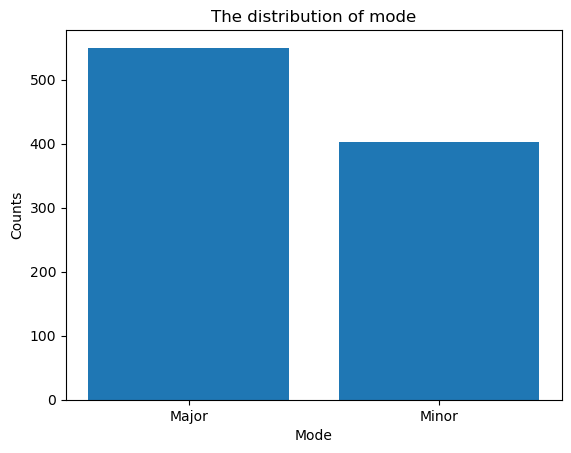

<Figure size 2000x1000 with 0 Axes>

In [40]:
mode_counts = categorical_cols['mode'].value_counts()
plt.bar(mode_counts.index, mode_counts.values);
plt.xticks()
plt.ylabel('Counts')
plt.xlabel('Mode')
plt.title('The distribution of mode')
plt.figure(figsize=(20, 10))
plt.show();

#### 7.1) What is the percentage of missing values?

In [41]:
miss_categorical_cols = {}
for col in categorical_cols.columns:
  miss_categorical_cols[col] = (df[col] == "nan").sum() / len(df)

pd.DataFrame(miss_categorical_cols, index=['Percentage']).transpose()


,Percentage
track_name,0.0
artist(s)_name,0.0
key,0.0
mode,0.0


#### 8) How many different values? Show a few

In [42]:
for idx, col in enumerate(df.columns, start=1):
  print(df[col].value_counts())
  print('--------------------')
  print()
  if idx % 5 == 0:
    break

Daylight                                  2
About Damn Time                           2
SNAP                                      2
Take My Breath                            2
Let It Snow! Let It Snow! Let It Snow!    2
                                         ..
Murder In My Mind                         1
Gangsta's Paradise                        1
CAIRO                                     1
I Love You So                             1
Alone                                     1
Name: track_name, Length: 943, dtype: int64
--------------------

Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: artist(s)_name, Length: 645, dtype: int64
--------------------

1    587
2    254
3     85
4

#### 9) Are they abnormal? 

- After visualizing and analyzing generally, we can make a conclusion that the dataset is suitable enough for us to use for training model and make questions and assumption from it. But before that, we need to preprocessing some values that have missing values in them

### 10) Correlation between attributes

C:\Users\Nien\AppData\Local\Temp\ipykernel_13156\1838363824.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


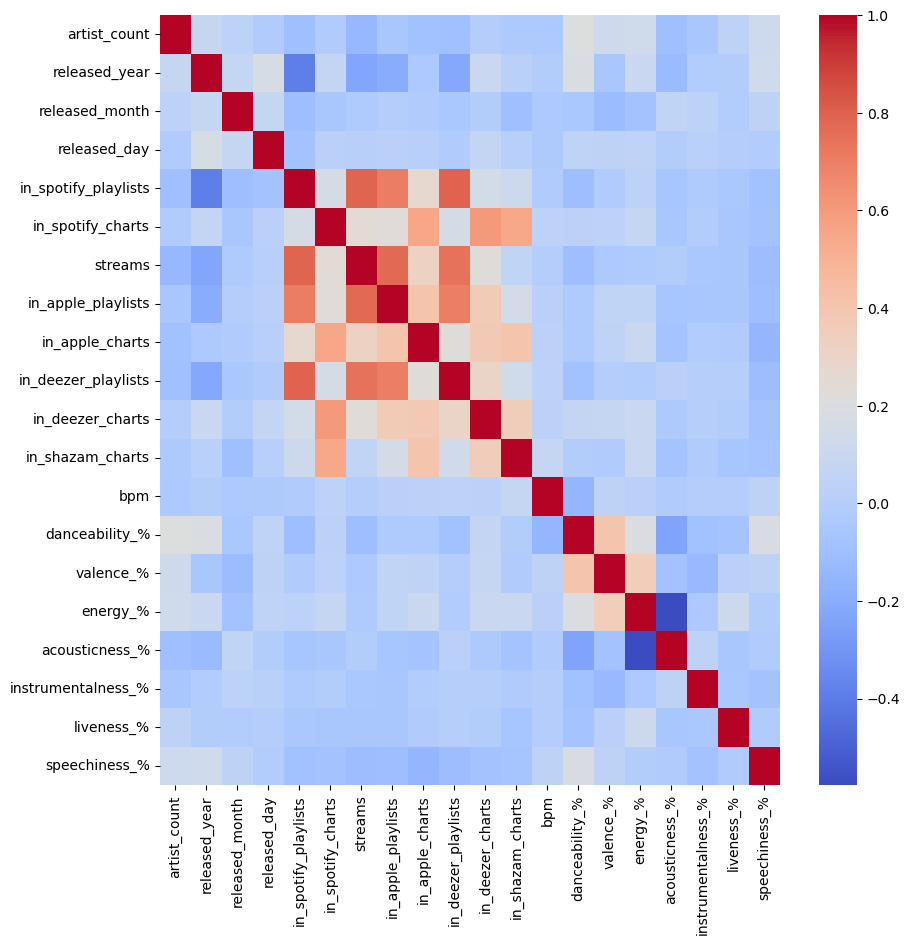

In [46]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm')

plt.show();